In [17]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [19]:
from zoobot.shared.schemas import cosmic_dawn_schema

In [20]:

advanced = pd.read_parquet('/Users/user/repos/zoobot-predictions/example/evo_py_co_vittiny_224_advanced.parquet')

In [21]:
# advanced = advanced.rename(columns=dict(zip(advanced.columns.values, [col.replace('-cd', '') for col in advanced.columns.values])))
# already removed

In [22]:
advanced['id_str'] = advanced['id_str'].astype(int)
advanced.head()


,id_str,hdf5_loc,smooth-or-featured_smooth_fraction,smooth-or-featured_featured-or-disk_fraction,smooth-or-featured_artifact_fraction,disk-edge-on_yes_fraction,disk-edge-on_no_fraction,has-spiral-arms_yes_fraction,has-spiral-arms_no_fraction,bar_strong_fraction,...,spiral-arm-count_1_proportion-asked,spiral-arm-count_2_proportion-asked,spiral-arm-count_3_proportion-asked,spiral-arm-count_4_proportion-asked,spiral-arm-count_more-than-4_proportion-asked,spiral-arm-count_cant-tell_proportion-asked,merging_none_proportion-asked,merging_minor-disturbance_proportion-asked,merging_major-disturbance_proportion-asked,merging_merger_proportion-asked
0,81,evo_py_co_vittiny_224_all.hdf5,0.132786,0.033417,0.833797,0.233886,0.766114,0.178112,0.821888,0.090581,...,0.004560,0.004560,0.004560,0.004560,0.004560,0.004560,1.0,1.0,1.0,1.0
1,206,evo_py_co_vittiny_224_all.hdf5,0.700095,0.109732,0.190174,0.241446,0.758554,0.204264,0.795736,0.056286,...,0.017002,0.017002,0.017002,0.017002,0.017002,0.017002,1.0,1.0,1.0,1.0
2,253,evo_py_co_vittiny_224_all.hdf5,0.779457,0.031841,0.188702,0.332185,0.667815,0.133248,0.866752,0.078469,...,0.002833,0.002833,0.002833,0.002833,0.002833,0.002833,1.0,1.0,1.0,1.0
3,290,evo_py_co_vittiny_224_all.hdf5,0.509703,0.264817,0.225480,0.040086,0.959914,0.414477,0.585523,0.039531,...,0.105361,0.105361,0.105361,0.105361,0.105361,0.105361,1.0,1.0,1.0,1.0
4,292,evo_py_co_vittiny_224_all.hdf5,0.552325,0.248554,0.199120,0.048617,0.951383,0.742429,0.257571,0.025981,...,0.175562,0.175562,0.175562,0.175562,0.175562,0.175562,1.0,1.0,1.0,1.0


In [23]:
advanced['smooth-or-featured_smooth_90pc-lower'][:5]

0    0.080555
1    0.630086
2    0.716723
3    0.432226
4    0.471858
Name: smooth-or-featured_smooth_90pc-lower, dtype: float64

In [24]:
labels = pd.read_parquet('/Users/user/repos/zoobot-predictions/example/data/cosmic_dawn_train_catalog.parquet')
labels['id_str'] = labels['id_str'].astype(int)
labels.head()

,id_str,smooth-or-featured-cd_smooth,smooth-or-featured-cd_featured-or-disk,smooth-or-featured-cd_problem,how-rounded-cd_round,how-rounded-cd_in-between,how-rounded-cd_cigar-shaped,disk-edge-on-cd_yes,disk-edge-on-cd_no,edge-on-bulge-cd_rounded,...,artifact-cd_diffraction_fraction,artifact-cd_ray_fraction,artifact-cd_saturation_fraction,artifact-cd_other_fraction,subject_id,locations,url,filename,file_loc,file_exists
0,1672100,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,85140047,"{""0"":""https://panoptes-uploads.zooniverse.org/...",https://panoptes-uploads.zooniverse.org/subjec...,61bc8472-b843-42ab-850d-5d63f8e91b86.jpeg,/home/walml/repos/galaxy-zoo-cosmic-dawn/data/...,True
1,1882495,6.0,0.0,3.0,6.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,85144424,"{""0"":""https://panoptes-uploads.zooniverse.org/...",https://panoptes-uploads.zooniverse.org/subjec...,305d3381-6921-4afb-9e0d-9f716bde4bdc.jpeg,/home/walml/repos/galaxy-zoo-cosmic-dawn/data/...,True
2,995849,2.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,85242035,"{""0"":""https://panoptes-uploads.zooniverse.org/...",https://panoptes-uploads.zooniverse.org/subjec...,5c693588-65f1-49b9-91d7-64c6e6f025c6.jpeg,/home/walml/repos/galaxy-zoo-cosmic-dawn/data/...,True
3,692227,3.0,0.0,2.0,3.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,85226122,"{""0"":""https://panoptes-uploads.zooniverse.org/...",https://panoptes-uploads.zooniverse.org/subjec...,141827b5-db0c-43fa-87f4-f9ccb6e4d350.jpeg,/home/walml/repos/galaxy-zoo-cosmic-dawn/data/...,True
4,130880,32.0,1.0,8.0,4.0,27.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,81348560,"{""0"":""https://panoptes-uploads.zooniverse.org/...",https://panoptes-uploads.zooniverse.org/subjec...,188717aa-5926-4bd5-9df8-7d6f0a4b2409.png,/home/walml/repos/galaxy-zoo-cosmic-dawn/data/...,True


In [25]:
labels = labels[[col for col in labels if '-cd' in col] + ['id_str']]
labels = labels.rename(columns=dict(zip(labels.columns.values, [col.replace('-cd', '') for col in labels.columns.values])))
labels.head()

,smooth-or-featured_smooth,smooth-or-featured_featured-or-disk,smooth-or-featured_problem,how-rounded_round,how-rounded_in-between,how-rounded_cigar-shaped,disk-edge-on_yes,disk-edge-on_no,edge-on-bulge_rounded,edge-on-bulge_boxy,...,problem_star_fraction,problem_artifact_fraction,problem_zoom_fraction,artifact_satellite_fraction,artifact_scattered_fraction,artifact_diffraction_fraction,artifact_ray_fraction,artifact_saturation_fraction,artifact_other_fraction,id_str
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1672100
1,6.0,0.0,3.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1882495
2,2.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,995849
3,3.0,0.0,2.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,692227
4,32.0,1.0,8.0,4.0,27.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,130880


In [26]:

for q in cosmic_dawn_schema.questions:
    labels[q.text + '_total-votes'] = labels[[a.text for a in q.answers]].sum(axis=1)
    for a in q.answers:
        labels[a.text + '_fraction'] = labels[a.text] / labels[q.text + '_total-votes']

In [27]:
df = pd.merge(advanced, labels, on='id_str', how='inner', suffixes=('_ml', '_vol'))
df.columns.values

array(['id_str', 'hdf5_loc', 'smooth-or-featured_smooth_fraction_ml',
       'smooth-or-featured_featured-or-disk_fraction_ml',
       'smooth-or-featured_artifact_fraction',
       'disk-edge-on_yes_fraction_ml', 'disk-edge-on_no_fraction_ml',
       'has-spiral-arms_yes_fraction_ml',
       'has-spiral-arms_no_fraction_ml', 'bar_strong_fraction_ml',
       'bar_weak_fraction_ml', 'bar_no_fraction_ml',
       'bulge-size_dominant_fraction_ml', 'bulge-size_large_fraction_ml',
       'bulge-size_moderate_fraction_ml', 'bulge-size_small_fraction_ml',
       'bulge-size_none_fraction_ml', 'how-rounded_round_fraction_ml',
       'how-rounded_in-between_fraction_ml',
       'how-rounded_cigar-shaped_fraction_ml',
       'edge-on-bulge_boxy_fraction_ml', 'edge-on-bulge_none_fraction_ml',
       'edge-on-bulge_rounded_fraction_ml',
       'spiral-winding_tight_fraction_ml',
       'spiral-winding_medium_fraction_ml',
       'spiral-winding_loose_fraction_ml',
       'spiral-arm-count_1_fracti

In [28]:
df = df[df['smooth-or-featured_total-votes'] >=36]
len(df)

69

In [29]:
def show_errorbars(df, answer, max_galaxies=100):

    df = df.sample(min(len(df), max_galaxies)).sort_values(answer.text + '_fraction_vol')
    
    i = np.arange(len(df))
    plt.errorbar(
        x=i,
        y=df[answer.text + '_fraction_ml'],
        yerr=(df[answer.text + '_fraction_ml']-df[answer.text + '_90pc-lower'], df[answer.text + '_90pc-upper']-df[answer.text + '_fraction_ml']),
        marker='.',
        # markersize=10.,
        linestyle='')

    plt.scatter(i, df[answer.text + '_fraction_vol'], color='r', marker='.')
    plt.ylim([0., 1.])
    plt.ylabel(f'Vol {answer.text} fraction')
    plt.xlabel('Galaxy')

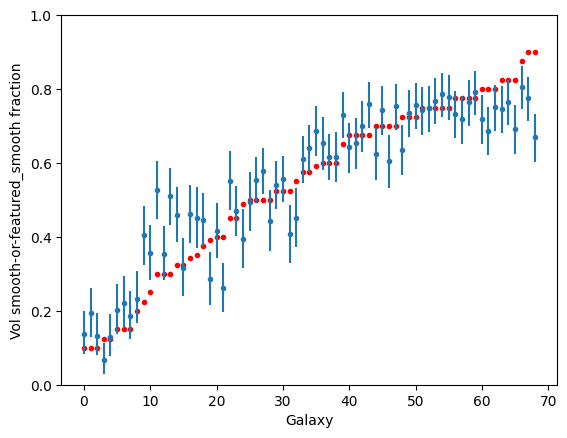

In [30]:

show_errorbars(df, answer=cosmic_dawn_schema.get_answer('smooth-or-featured_smooth'))

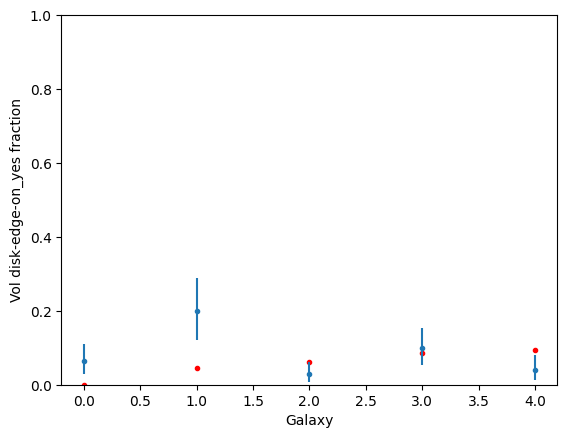

In [31]:
# temp = advanced.sort_values('smooth-or-featured_smooth_fraction')  # ml
temp = df.sort_values('disk-edge-on_yes_fraction_vol')  # vols, calc above
temp = temp[temp['smooth-or-featured_featured-or-disk_fraction_vol'] > .5]

show_errorbars(temp, answer=cosmic_dawn_schema.get_answer('disk-edge-on_yes'))

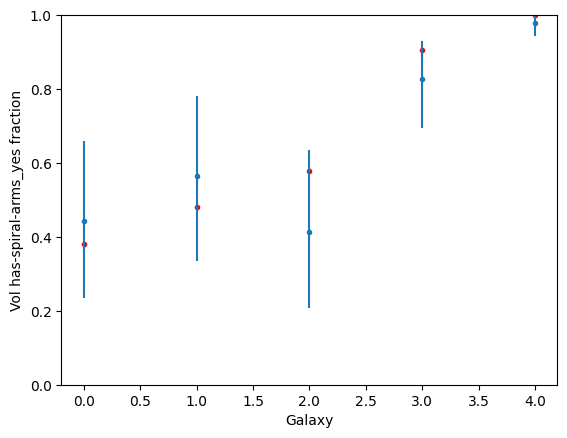

In [32]:
temp = df.sort_values('has-spiral-arms_yes_fraction_vol')
temp = temp[temp['has-spiral-arms_total-votes'] >= 18]

show_errorbars(temp, answer=cosmic_dawn_schema.get_answer('has-spiral-arms_yes'))


In [33]:
# TODO disk edge on and spiral arms as example figures showing uncertainties

In [34]:
temp['smooth-or-featured_smooth_fraction_vol']

18    0.300
55    0.250
3     0.300
9     0.300
91    0.125
Name: smooth-or-featured_smooth_fraction_vol, dtype: float64

In [35]:
temp.iloc[-4]['id_str']

431562

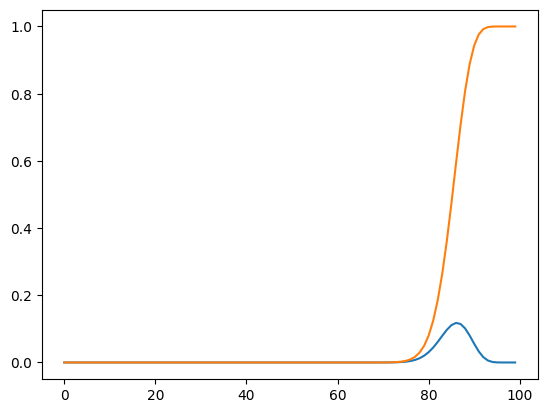

In [36]:
concentrations = np.array([[[92.18843,   91.6925,    91.49667,   96.85471,   86.715965 ]],

 [[ 7.303921,   6.666026,   7.1709514,  5.68773,    6.582647 ]],

 [[ 8.738571,   7.692705,   8.463262,   8.035879,   6.2074027]]])

# concentrations = np.expand_dims(concentrations, axis=1)
concentrations = concentrations.transpose(1, 0, 2)
# concentrations.shape

from zoobot.shared import stats

grid, pdf, cdf = stats.beta_mixture_on_grid(concentrations, 0, gridsize=100)
plt.plot(pdf[0])
plt.plot(cdf[0])


In [37]:
stats.get_confidence_interval_from_binned_dist(grid, pdf, cdf, interval_width=.95)

(array([1.e-08]), array([0.9090909]))

In [38]:
stats.get_confidence_interval_from_binned_dist(grid, pdf, cdf, interval_width=.9)

(array([0.78787878]), array([0.9090909]))

In [39]:
temp['smooth-or-featured_smooth_95pc-lower']

KeyError: 'smooth-or-featured_smooth_95pc-lower'

In [ ]:
temp['smooth-or-featured_smooth_95pc-upper']

6     0.656566
57    0.747475
37    0.393939
22    0.717172
33    0.424242
41    0.464646
30    0.616162
43    0.868687
19    0.666667
14    0.757576
32    0.787879
44    0.808081
8     0.858586
34    0.838384
17    0.858586
3     0.979798
25    0.878788
39    0.878788
52    0.909091
36    0.888889
13    0.989899
21    0.989899
40    0.919192
4     0.898990
7     0.989899
45    0.919192
56    0.919192
50    0.898990
0     0.919192
47    0.909091
28    0.989899
9     0.989899
29    0.989899
Name: smooth-or-featured_smooth_95pc-upper, dtype: float64